# Statistics Excersise on College Dataset

This dataset is from the *Introduction to Statistical Learning* book's <a href="http://www-bcf.usc.edu/~gareth/ISL/data.html">website</a>. 

___
The purpose of this excersize is to apply some basic probability theory to this dataset. We will use python and its pandas, sklearn, and visualization libraries to work through the data and build our model. 

Our *task* is to make predictions about graduation rates and we will use a linear regression model to perfrom this task. Based on our model's performance, we can make decisions as to what specific qualities about a college should be focused on to increase the graduation rate.
___

## The Data

These are the data attributes and their meanings
* Private: public/private indicator
* Apps: number of applications received
* Accept: number of applications accepted
* Enroll: number of new students enrolled
* Top10perc: new students from top 10% of H.S. class
* Top25perc: new students from top 25% of H.S. class
* F.Undergrad: number of fulltime undergraduates
* P.Undergrad: number of parttime undergraduates
* Outstate: out-of-state tuition
* Room.Board: room and board costs
* Books: estimated book costs
* Personal: estimated personal spending
* PhD: percent of faculty with Ph.D.’s
* Terminal: percentt of faculty with terminal degree
* S.F.Ratio: student/faculty ratio
* perc.alumni: percent alumni who donate
* Expend: instructional expenditure per student
* Grad.Rate: graduation rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data into a pandas dataframe
df = pd.read_csv('College_Data')

The first thing to do with any dataset, is to get to know what you are working with. To do this, we will check out how the data is structured in the pandas dataframe. This way we can get a general sense of the data layout.

In [3]:
# check out the first 5 observations
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# get info on the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


It looks like we have 777 observations of various data types. Mostly integers.

## Check out the distribution of graduation rates for all the colleges

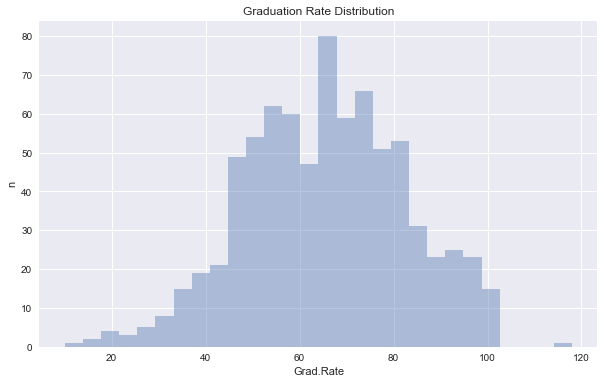

In [5]:
n_bins = int(np.ceil(np.sqrt(len(df.index))))  # calculate # of bins
f = plt.figure(figsize=(10,6))
sns.distplot(df['Grad.Rate'],bins=n_bins,kde=False)
plt.ylabel('n')
plt.title('Graduation Rate Distribution')

This distribution looks normaly distributed. However, there is a weird outlier that doesn't make sense. Let's fix that.

In [6]:
# find non-sense data point
df[df['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


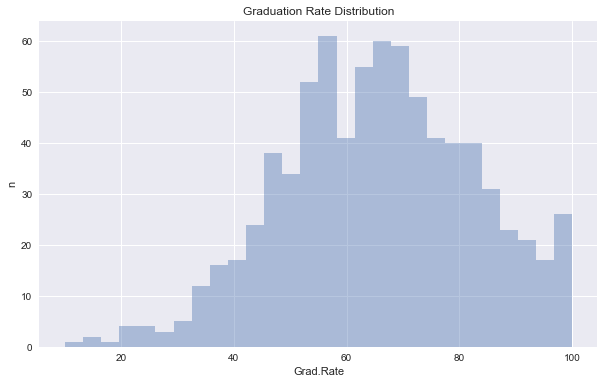

In [7]:
# change it to 100% so it makes sense
df.loc[df['Grad.Rate']>100, 'Grad.Rate'] = 100
# see if it worked
f = plt.figure(figsize=(10,6))
sns.distplot(df['Grad.Rate'],bins=n_bins,kde=False)
plt.ylabel('n')
plt.title('Graduation Rate Distribution')

## Some basic stats the manual way:

In [8]:
# homebrewed mean
my_mean = df['Grad.Rate'].sum()/df['Grad.Rate'].count()

# defining a function for the variance
def var_fun(x, mu):
    """
    var_fun:(sample population, sample mean)
        
        Calculates the variance of a sample population given its mean
    """
    x = x.values
    my_vari = sum([(item-mu)**2 for item in x])/len(x)
    return my_vari
my_var = var_fun(df['Grad.Rate'], my_mean)

print('Basic stats for graduation rate the "homebrew" way:')
print('The mean graduation rate is ' + str(round(my_mean,3)))
print('The variance is ' + str(round(my_var,3)))
print('The standard deviation is ' + str(round(np.sqrt(my_var),3)))


Basic stats for graduation rate the "homebrew" way:
The mean graduation rate is 65.44
The variance is 292.676
The standard deviation is 17.108


## Some basic stats the "Python way":

In [9]:
py_mean = df['Grad.Rate'].mean()
py_var = df['Grad.Rate'].var()
py_std = df['Grad.Rate'].std()

print('Basic stats for graduation rate the Python way:')
print('The mean graduation rate is ' + str(round(py_mean,3)))
print('The variance is ' + str(round(py_var,3)))
print('The standard deviation is ' + str(round(np.sqrt(py_var),3)))

Basic stats for graduation rate the Python way:
The mean graduation rate is 65.44
The variance is 293.053
The standard deviation is 17.119


or... we could use the one-liner from the Pandas library:

In [10]:
df['Grad.Rate'].describe()

count    777.000000
mean      65.440154
std       17.118804
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad.Rate, dtype: float64

** This dataset is made up of both private and public colleges. Let's see the difference in graduation rates:**

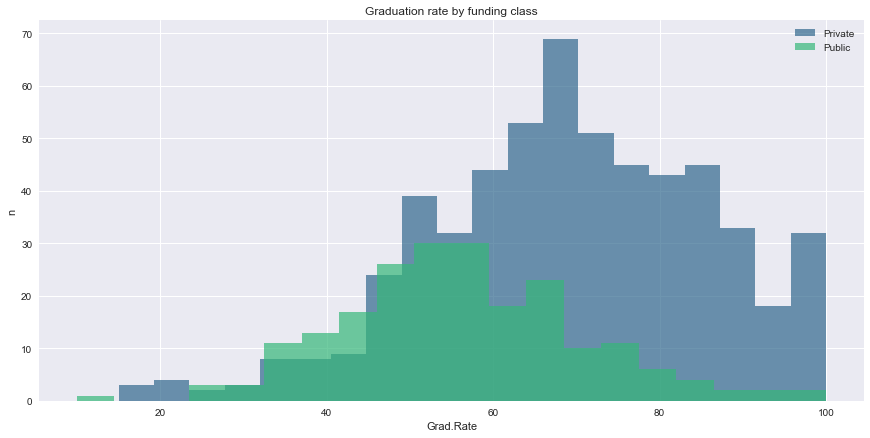

In [11]:
g = sns.FacetGrid(df,hue="Private",palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(['Private','Public'])
plt.ylabel('n')
plt.title('Graduation rate by funding class')

From this plot, it looks like private colleges, on average have a higher graduation rate. Lets calculate the mean for each.

In [12]:
priv_or_pub = df.groupby('Private').mean()
priv_or_pub['Grad.Rate']

Private
No     56.042453
Yes    68.966372
Name: Grad.Rate, dtype: float64

** A classic graph in statistics to investigate how the data is dispersed throughout the set **

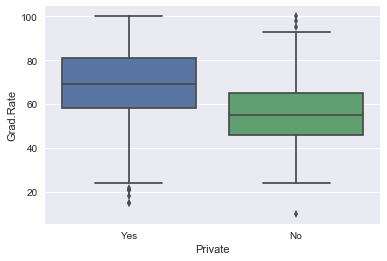

In [13]:
sns.boxplot(x='Private',y='Grad.Rate',data=df)

## Lets explore the relationship between the student faculty ratio and graduation rate

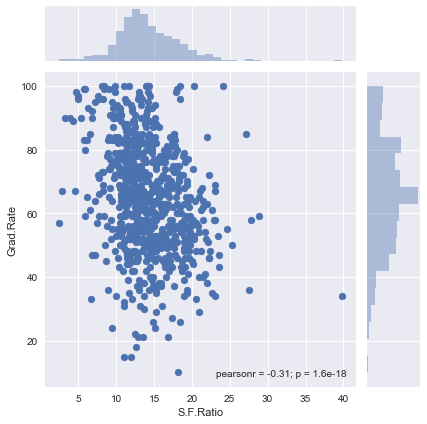

In [14]:
sns.jointplot(x='S.F.Ratio',y='Grad.Rate',data=df,kind='scatter')

it looks like there may be a linear correlation here. We can plot a regression line through this data

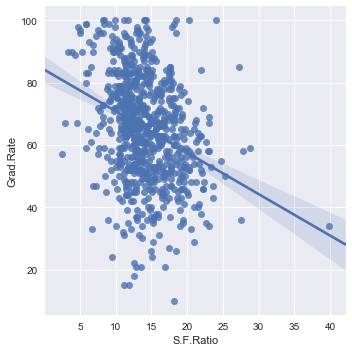

In [15]:
sns.lmplot(x='S.F.Ratio',y='Grad.Rate',data = df)

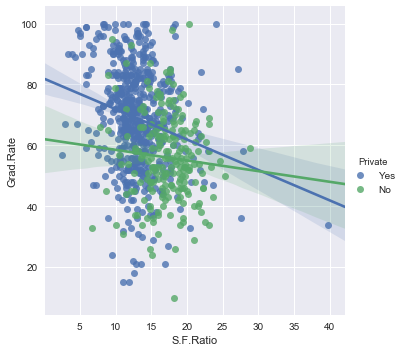

In [16]:
# separating private vs. public
sns.lmplot(x='S.F.Ratio',y='Grad.Rate',data = df,hue='Private',legend=True)

Just from looking at the plot, it doesn't look like student/faculty ratio is a very good predictor of graduation rate. But let's push forward to quantify the regression line's performance.

# Here we will get into some basic machine learning.

First I'll set assign the data I'm interested in to the standard variables used in ML.

In [17]:
y = df['Grad.Rate']   # thing I want to predict
X = df['S.F.Ratio'].values.reshape(-1,1)   # data I have to predict with
# had to reshape X array because it only has 1 attribute (i got a warning that told me to do this)

Now I'll use a library from scikit learn to split the data into a training set and a testing set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now I can train a linear regression model to the training set.
I will do this by importing a linear regression method from scikit learn, initializing an instance and then fitting the training data to that instance.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_model = LinearRegression()

In [21]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the regression model has been built, I can print out the coefficients of the model

In [22]:
print('Linear Regression Model Coefficient : \n', lin_model.coef_)

Linear Regression Model Coefficient : 
 [-1.50425724]


Yay! we found the slope of a line. Who Hoo! But what does this slope mean?

For every unit increase in the student/faculty ratio, we predict that there will be a drop in the graduation rate of about 1.3%

## Lets make some predictions based on our new model and the test data

using the predict method I can create an array of predictions

In [23]:
predictions = lin_model.predict(X_test)

Here are all the graduation rate predictions our model made based on the student/faculty ratios of our test data

In [24]:
predictions

array([ 68.8705079 ,  58.49113294,  63.60560756,  57.28772715,
        61.9509246 ,  61.80049887,  69.47221079,  63.15433039,
        71.12689376,  68.8705079 ,  49.61601523,  59.69453874,
        68.268805  ,  59.84496446,  67.51667638,  65.56114197,
        66.31327059,  80.30286292,  68.56965645,  81.80712016,
        63.00390466,  76.54221982,  75.03796258,  70.67561659,
        64.80901335,  71.27731948,  64.05688473,  53.37665833,
        52.02282681,  67.51667638,  67.81752783,  68.56965645,
        69.62263652,  67.96795355,  68.41923073,  65.56114197,
        69.02093362,  76.69264555,  73.38327962,  54.12878695,
        65.7115677 ,  65.7115677 ,  71.27731948,  73.53370534,
        72.78157672,  65.7115677 ,  76.99349699,  61.3492217 ,
        70.97646803,  64.5081619 ,  67.06539921,  51.27069819,
        57.73900432,  69.77306224,  59.39368729,  61.65007315,
        66.46369631,  67.81752783,  65.86199342,  64.65858763,
        64.35773618,  67.51667638,  69.32178507,  66.76

** Since we know the actual graduation rates of the test data we can see how well our model performed! **

Lets visualize the performance.  If the graph shows a strong linear correlation then it performed well. The more "scattered" the plot is, the less of a predictor it is.

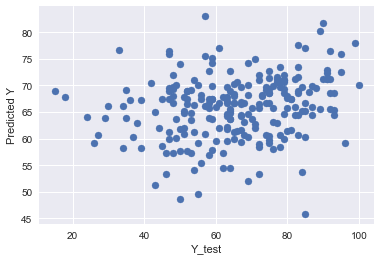

In [25]:
# lets visualize the performance
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

Well, it looks pretty sucky. But we can quantify its suckiness using sklearn's metrics library.

The most common metrics for evaluating the performance of a regression model are the:

%%latex 
* mean absolute error - measures the difference between two continouis variables (cite: <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">wiki</a>)

 $ MAE = \frac{\sum_{i=1}^n |y_i-x_i|}{n}$
* mean squared error - this is a measure of the quality of the model. Values closer to zero have higher quality

 $ MSE = \frac{1}{n}\sum_{i=1}^n (\hat{Y}_i-Y_i)^2$
 
 where: $\hat{Y_i}$ are predicted values and $Y_i$ are observed values
 

* root mean squared error - _ this is a measure of how accurate the model was. The RMSE is affected by both the average of the squared errors and the variation of the errors. This means that if your data has a lot, or extreme outliers, the RSME will be higher.

 $ RMSE = \sqrt{\frac{\sum_{i=1}^n (\hat{y}_i-y_i)^2}{n}}$
 
 where: $\hat{y_i}$ are predicted values and $y_i$ are observed values
 
 
(cite: <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">wiki</a>)

To get these values let's let python do the math for us!

In [26]:
from sklearn import metrics

In [27]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R_2 = lin_model.score(X_test,y_test)
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('R squared = ', R_2)

MAE =  13.1431379479
MSE =  269.851347956
RMSE =  16.4271527647
R squared =  0.0301786788771


Now we have performance measures that we can compare to other models.

## Can we create a linear model that does a good job at predicting graduation rate?

In the last model we were only looking at one atribute in the dataset.  Let's add more.

We could just choose some more attributes based on our intuition. But, sometimes that could be dangerous, what if our initial assumptions are wrong?

We can visualize correlations between atributes with a heat map! But before we do that we will scale all our data. This is called **data standardization** or **Z-score normalization**. It is sometimes important when dealing with multiple features and their variances.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Now that our scaler is created we can fit our observation data to it (without the target observation or string datatypes). Then we will turn it into a new scaled feature set with the grad rate added back in.

In [29]:
scaler.fit(df.drop(['Grad.Rate','Private','Unnamed: 0'],axis=1))
scaled_features = scaler.transform(df.drop(['Grad.Rate','Private','Unnamed: 0'], axis=1))
df_scaled = pd.DataFrame(scaled_features,columns=df.drop(['Grad.Rate','Private','Unnamed: 0'],axis=1).columns)
df_scaled['Grad.Rate'] = df['Grad.Rate']

How we have a dataset with all numerical data at the same scale. We can check out the first 5 entries. Then plot our heatmap.

In [30]:
df_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,60
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,56
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,54
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,59
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,15


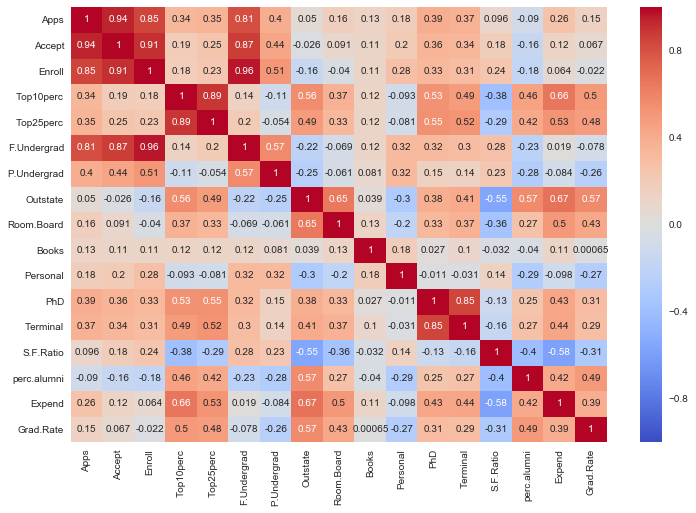

In [31]:
f = plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(),cmap='coolwarm',annot=True)

Now I want to choose a few attributes that have higher correlation values relative to Grad.Rate.  It looks like there are more attributes that positivley correlated to graduation rate, so I will build a model that predicts an increase in graduation rate.

perc.alumni, Top10perc, Top25perc and Outstate look like good canditates. Lets redefine our X data and work build another model

In [32]:
X_new = df_scaled[['Top10perc','Top25perc','perc.alumni','Outstate']]
y_new = df_scaled['Grad.Rate']

In [33]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new,test_size=0.3)

In [34]:
new_lin_model = LinearRegression()

In [35]:
new_lin_model.fit(X_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the new model is built we can look at our coefficients

In [36]:
print('New model coefficients: \n', new_lin_model.coef_)

New model coefficients: 
 [-0.49371343  4.76154455  3.71366412  5.81490955]


In [37]:
new_predictions = new_lin_model.predict(X_test_new)

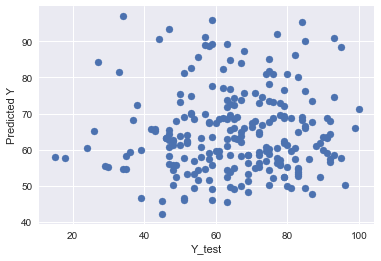

In [38]:
# lets visualize the performance
plt.scatter(y_test, new_predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

In [39]:
MAE_new = metrics.mean_absolute_error(y_test_new,new_predictions)
MSE_new = metrics.mean_squared_error(y_test_new,new_predictions)
RMSE_new = np.sqrt(MSE_new)
R_2_new = new_lin_model.score(X_test_new,y_test_new)
print('New model:')
print('MAE = ', MAE_new)
print('MSE = ', MSE_new)
print('RMSE = ', RMSE_new)
print('R Squared = ', R_2_new)
print('\n')
print('Old model:')
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('R Squared = ', R_2)

New model:
MAE =  10.9611362338
MSE =  201.753520664
RMSE =  14.203996644
R Squared =  0.332956286547


Old model:
MAE =  13.1431379479
MSE =  269.851347956
RMSE =  16.4271527647
R Squared =  0.0301786788771


A marginal improvement. It looks like a simple linear regression, is not adequate for creating a good machine learning model. Let's not give up quite yet! There are more tools in our toolbelt. 

---------------------

## Lasso

Lasso (least absolute shrinkage and selection operator) is a regression method that uses <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">coordinate decent</a> optimization to help select variables that contribute to our target.  Essentially, it selects good predictors for us! How does it do this? 

Lasso works by forcing the sum of the absolute value of the regression coefficients to be less than a fixed value. This forces certain coefficients to be zero (cite: <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">wiki</a>). This *loss function* penalizes features that do not have much correlation with the target value. 

Let's give it a spin.

First we'll create test and train data for the entire college dataset using our scaled features data.

In [40]:
X_lasso = df_scaled.drop('Grad.Rate',axis=1)
y_lasso = df_scaled['Grad.Rate']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.3)

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso(alpha=.1)      

In [44]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
lasso_predictions = lasso.predict(X_test)

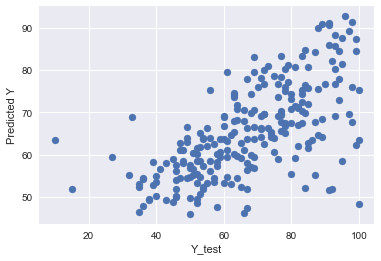

In [46]:
# lets visualize the performance
plt.scatter(y_test, lasso_predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

We are definately starting to see a linear correlation emerging!

In [47]:
MAE_lasso = metrics.mean_absolute_error(y_test,lasso_predictions)
MSE_lasso = metrics.mean_squared_error(y_test,lasso_predictions)
RMSE_lasso = np.sqrt(MSE_lasso)
R_2_lasso = lasso.score(X_test,y_test)
print('LASSO model:')
print('MAE = ', MAE_lasso)
print('MSE = ', MSE_lasso)
print('RMSE = ', RMSE_lasso)
print('R squared = ', R_2_lasso)
print('\n')
print('self-selected model:')
print('MAE = ', MAE_new)
print('MSE = ', MSE_new)
print('RMSE = ', RMSE_new)
print('R Squared = ', R_2_new)
print('\n')
print('Old model:')
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('R Squared = ', R_2)

LASSO model:
MAE =  10.5011618256
MSE =  193.397879293
RMSE =  13.9067566058
R squared =  0.403224053764


self-selected model:
MAE =  10.9611362338
MSE =  201.753520664
RMSE =  14.203996644
R Squared =  0.332956286547


Old model:
MAE =  13.1431379479
MSE =  269.851347956
RMSE =  16.4271527647
R Squared =  0.0301786788771


We can now take a look at which variables were selected during the training of the model.

In [48]:
coeffs = pd.Series(data=lasso.coef_, index = df.drop(['Grad.Rate','Private','Unnamed: 0'],axis=1).columns )
coeffs

Apps           2.126526
Accept        -0.000000
Enroll         0.000000
Top10perc      0.391046
Top25perc      3.661487
F.Undergrad   -0.000000
P.Undergrad   -2.151422
Outstate       4.053568
Room.Board     2.066308
Books         -0.005193
Personal      -2.086765
PhD            1.372069
Terminal      -1.424461
S.F.Ratio      0.169605
perc.alumni    3.408265
Expend        -1.818709
dtype: float64

From this analysis it appears that the bigest factor to graduation rate is the Out of state students feature, followed by percent alumni who donate, and the number of students who were top 25% in their high school class.

Back to [Chapter 5 lecture](Machine Learning Basics.ipynb) notebook